# Import libraries 

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [111]:
from scipy.linalg import LinAlgWarning
import warnings

warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')

# Import Data 

In [112]:
file = pd.read_csv(r"heart.csv")

In [113]:
file.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,No,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,No,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,No,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,No,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,No,Normal,122,N,0.0,Up,No


# Missing Values

<AxesSubplot:>

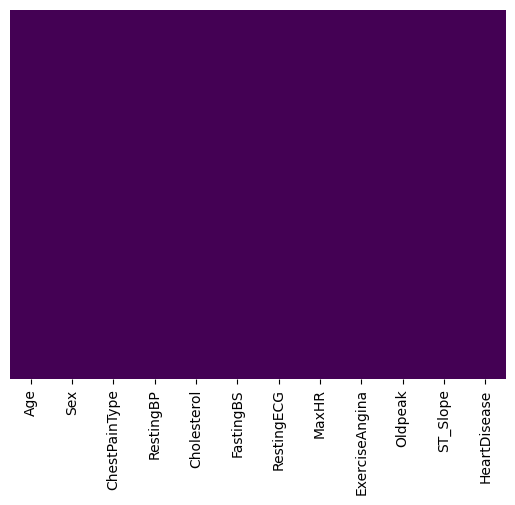

In [114]:
sns.heatmap(file.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Fitting the data by categorizing the age factor 

In [115]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [116]:
def age_buckets(x):
    if x < 45: 
        return '26-45' 
    elif x < 62: 
        return '45-62'  
    elif x >=62: 
        return '62+' 
    else: 
        return 'other'

In [117]:
file['agerange'] = file.Age.apply(age_buckets)

In [118]:
file.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,agerange
0,40,M,ATA,140,289,No,Normal,172,N,0.0,Up,No,26-45
1,49,F,NAP,160,180,No,Normal,156,N,1.0,Flat,Yes,45-62
2,37,M,ATA,130,283,No,ST,98,N,0.0,Up,No,26-45
3,48,F,ASY,138,214,No,Normal,108,Y,1.5,Flat,Yes,45-62
4,54,M,NAP,150,195,No,Normal,122,N,0.0,Up,No,45-62


# Import libraries and save the file 

In [120]:
import category_encoders as ce

In [121]:
encoder = ce.OrdinalEncoder(file.columns)

file1 = encoder.fit_transform(file)
file1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,agerange
0,40,1,1,140,289,1,1,172,1,0.0,1,1,1
1,49,2,2,160,180,1,1,156,1,1.0,2,2,2
2,37,1,1,130,283,1,2,98,1,0.0,1,1,1
3,48,2,3,138,214,1,1,108,2,1.5,2,2,2
4,54,1,2,150,195,1,1,122,1,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,1,1,132,1,1.2,2,2,2
914,68,1,3,144,193,2,1,141,1,3.4,2,2,3
915,57,1,3,130,131,1,1,115,2,1.2,2,2,2
916,57,2,1,130,236,1,3,174,1,0.0,2,2,2


In [122]:
file1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,agerange
0,40,1,1,140,289,1,1,172,1,0.0,1,1,1
1,49,2,2,160,180,1,1,156,1,1.0,2,2,2
2,37,1,1,130,283,1,2,98,1,0.0,1,1,1
3,48,2,3,138,214,1,1,108,2,1.5,2,2,2
4,54,1,2,150,195,1,1,122,1,0.0,1,1,2


In [26]:
del file1["Age"]

In [123]:
file1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,agerange
0,40,1,1,140,289,1,1,172,1,0.0,1,1,1
1,49,2,2,160,180,1,1,156,1,1.0,2,2,2
2,37,1,1,130,283,1,2,98,1,0.0,1,1,1
3,48,2,3,138,214,1,1,108,2,1.5,2,2,2
4,54,1,2,150,195,1,1,122,1,0.0,1,1,2


# Find the correlation between variables and view the function pattern draw between them also 

<AxesSubplot:>

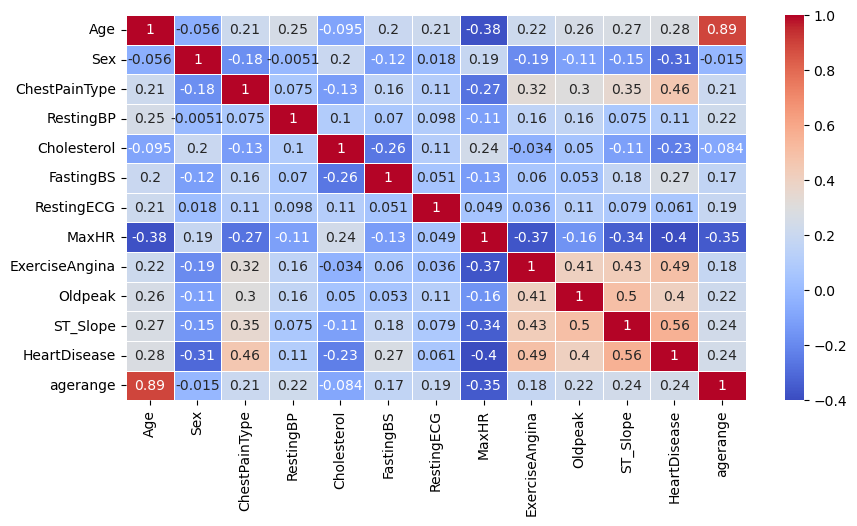

In [124]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(file1.corr(), annot = True, fmt='.2g',cmap= 'coolwarm',linewidth=.5,ax=ax)

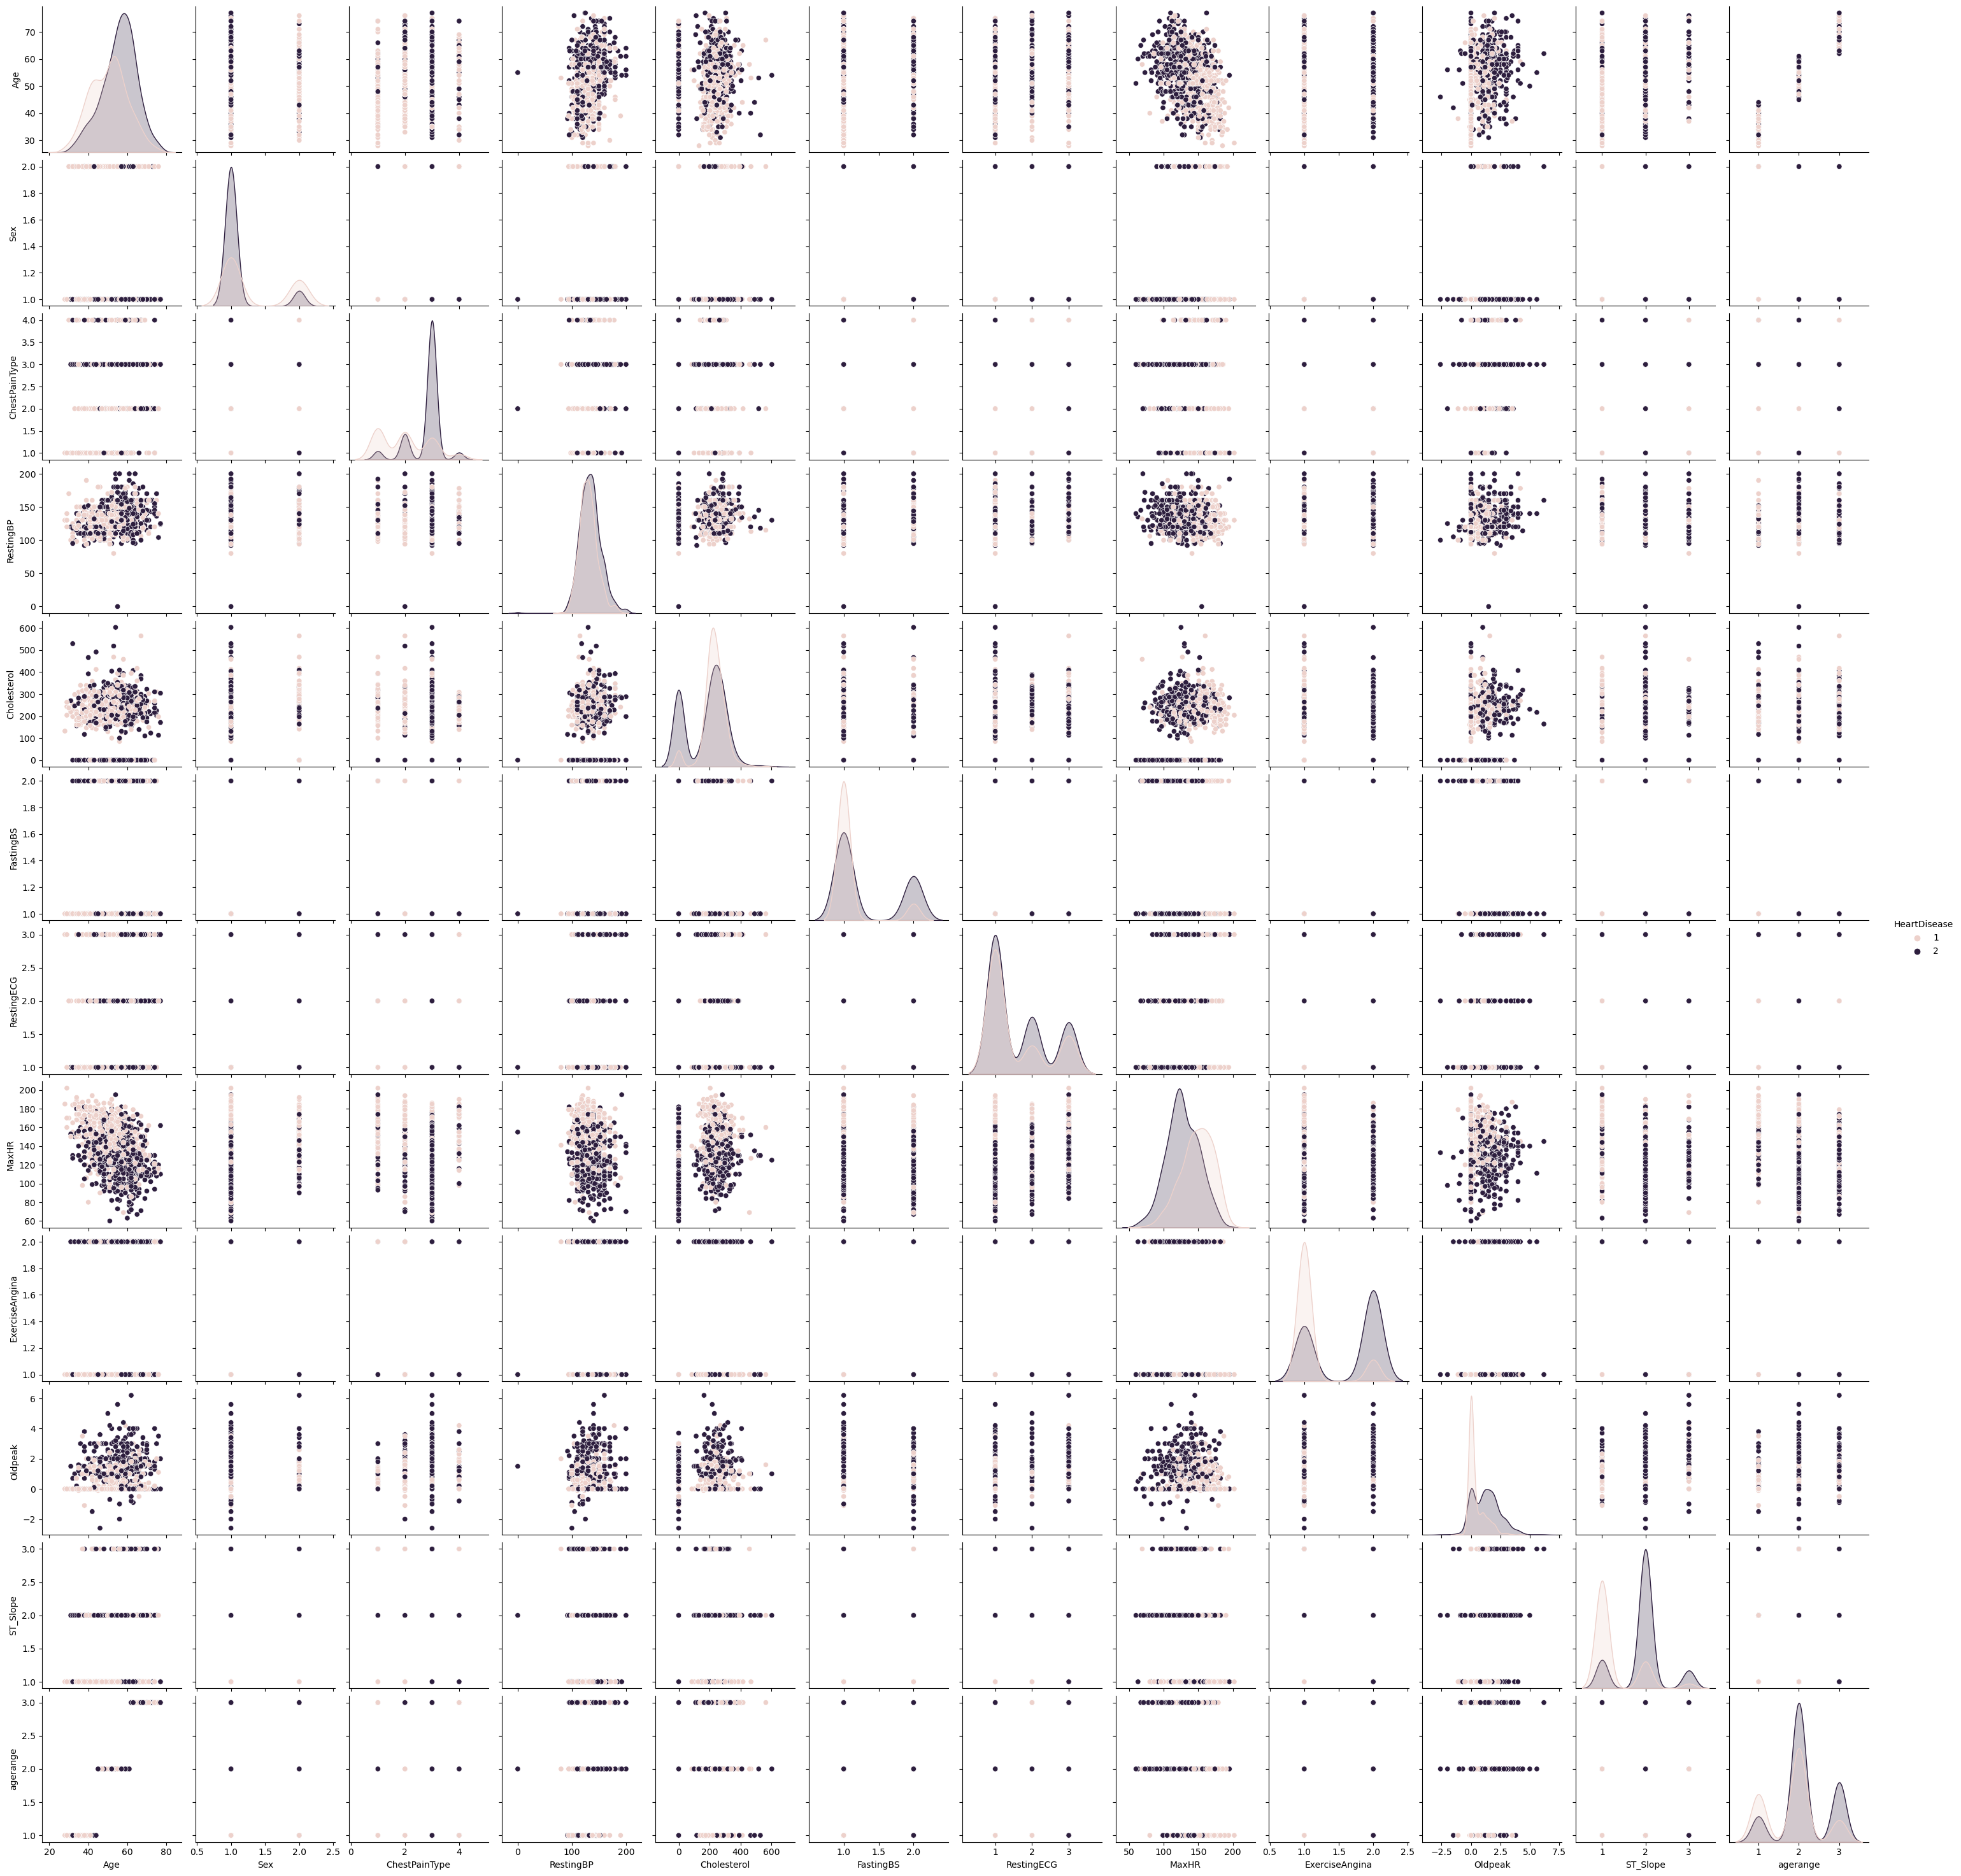

In [125]:
sns.pairplot(data=file1, hue='HeartDisease')
plt.show()

# Load X-train and Y-train data 

In [126]:
X = file1.drop(['HeartDisease'], axis=1)

y = file1['HeartDisease']

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [128]:
X_train.shape, X_test.shape,y_train.shape

((550, 12), (368, 12), (550,))

In [129]:
X_train.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int32
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
agerange            int32
dtype: object

In [130]:
X_test.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int32
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
agerange            int32
dtype: object

# Build and fit a model to predict values using the GINI index 

In [153]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [154]:
y_pred_test_gini = clf_gini.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
y_pred_train_gini = clf_gini.predict(X_train)

# Find the train and test models’ accuracy 

In [157]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8800


In [158]:
print('Training-set accuracy score: {0:0.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test-set accuracy score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training-set accuracy score: 0.8800
Test-set accuracy score: 0.7989


# Draw a decision tree for the base of the feature on the higher GINI index  

[Text(0.49107142857142855, 0.9, 'X[10] <= 1.5\ngini = 0.499\nsamples = 550\nvalue = [263, 287]'),
 Text(0.26785714285714285, 0.7, 'X[9] <= 1.25\ngini = 0.256\nsamples = 232\nvalue = [197, 35]'),
 Text(0.14285714285714285, 0.5, 'X[2] <= 2.5\ngini = 0.179\nsamples = 211\nvalue = [190, 21]'),
 Text(0.07142857142857142, 0.3, 'X[9] <= 0.25\ngini = 0.043\nsamples = 137\nvalue = [134, 3]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.017\nsamples = 120\nvalue = [119, 1]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.21428571428571427, 0.3, 'X[8] <= 1.5\ngini = 0.368\nsamples = 74\nvalue = [56, 18]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.285\nsamples = 58\nvalue = [48, 10]'),
 Text(0.25, 0.1, 'gini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.39285714285714285, 0.5, 'X[9] <= 2.35\ngini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.35714285714285715, 0.3, 'X[9] <= 1.95\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.32142857142857145, 0.

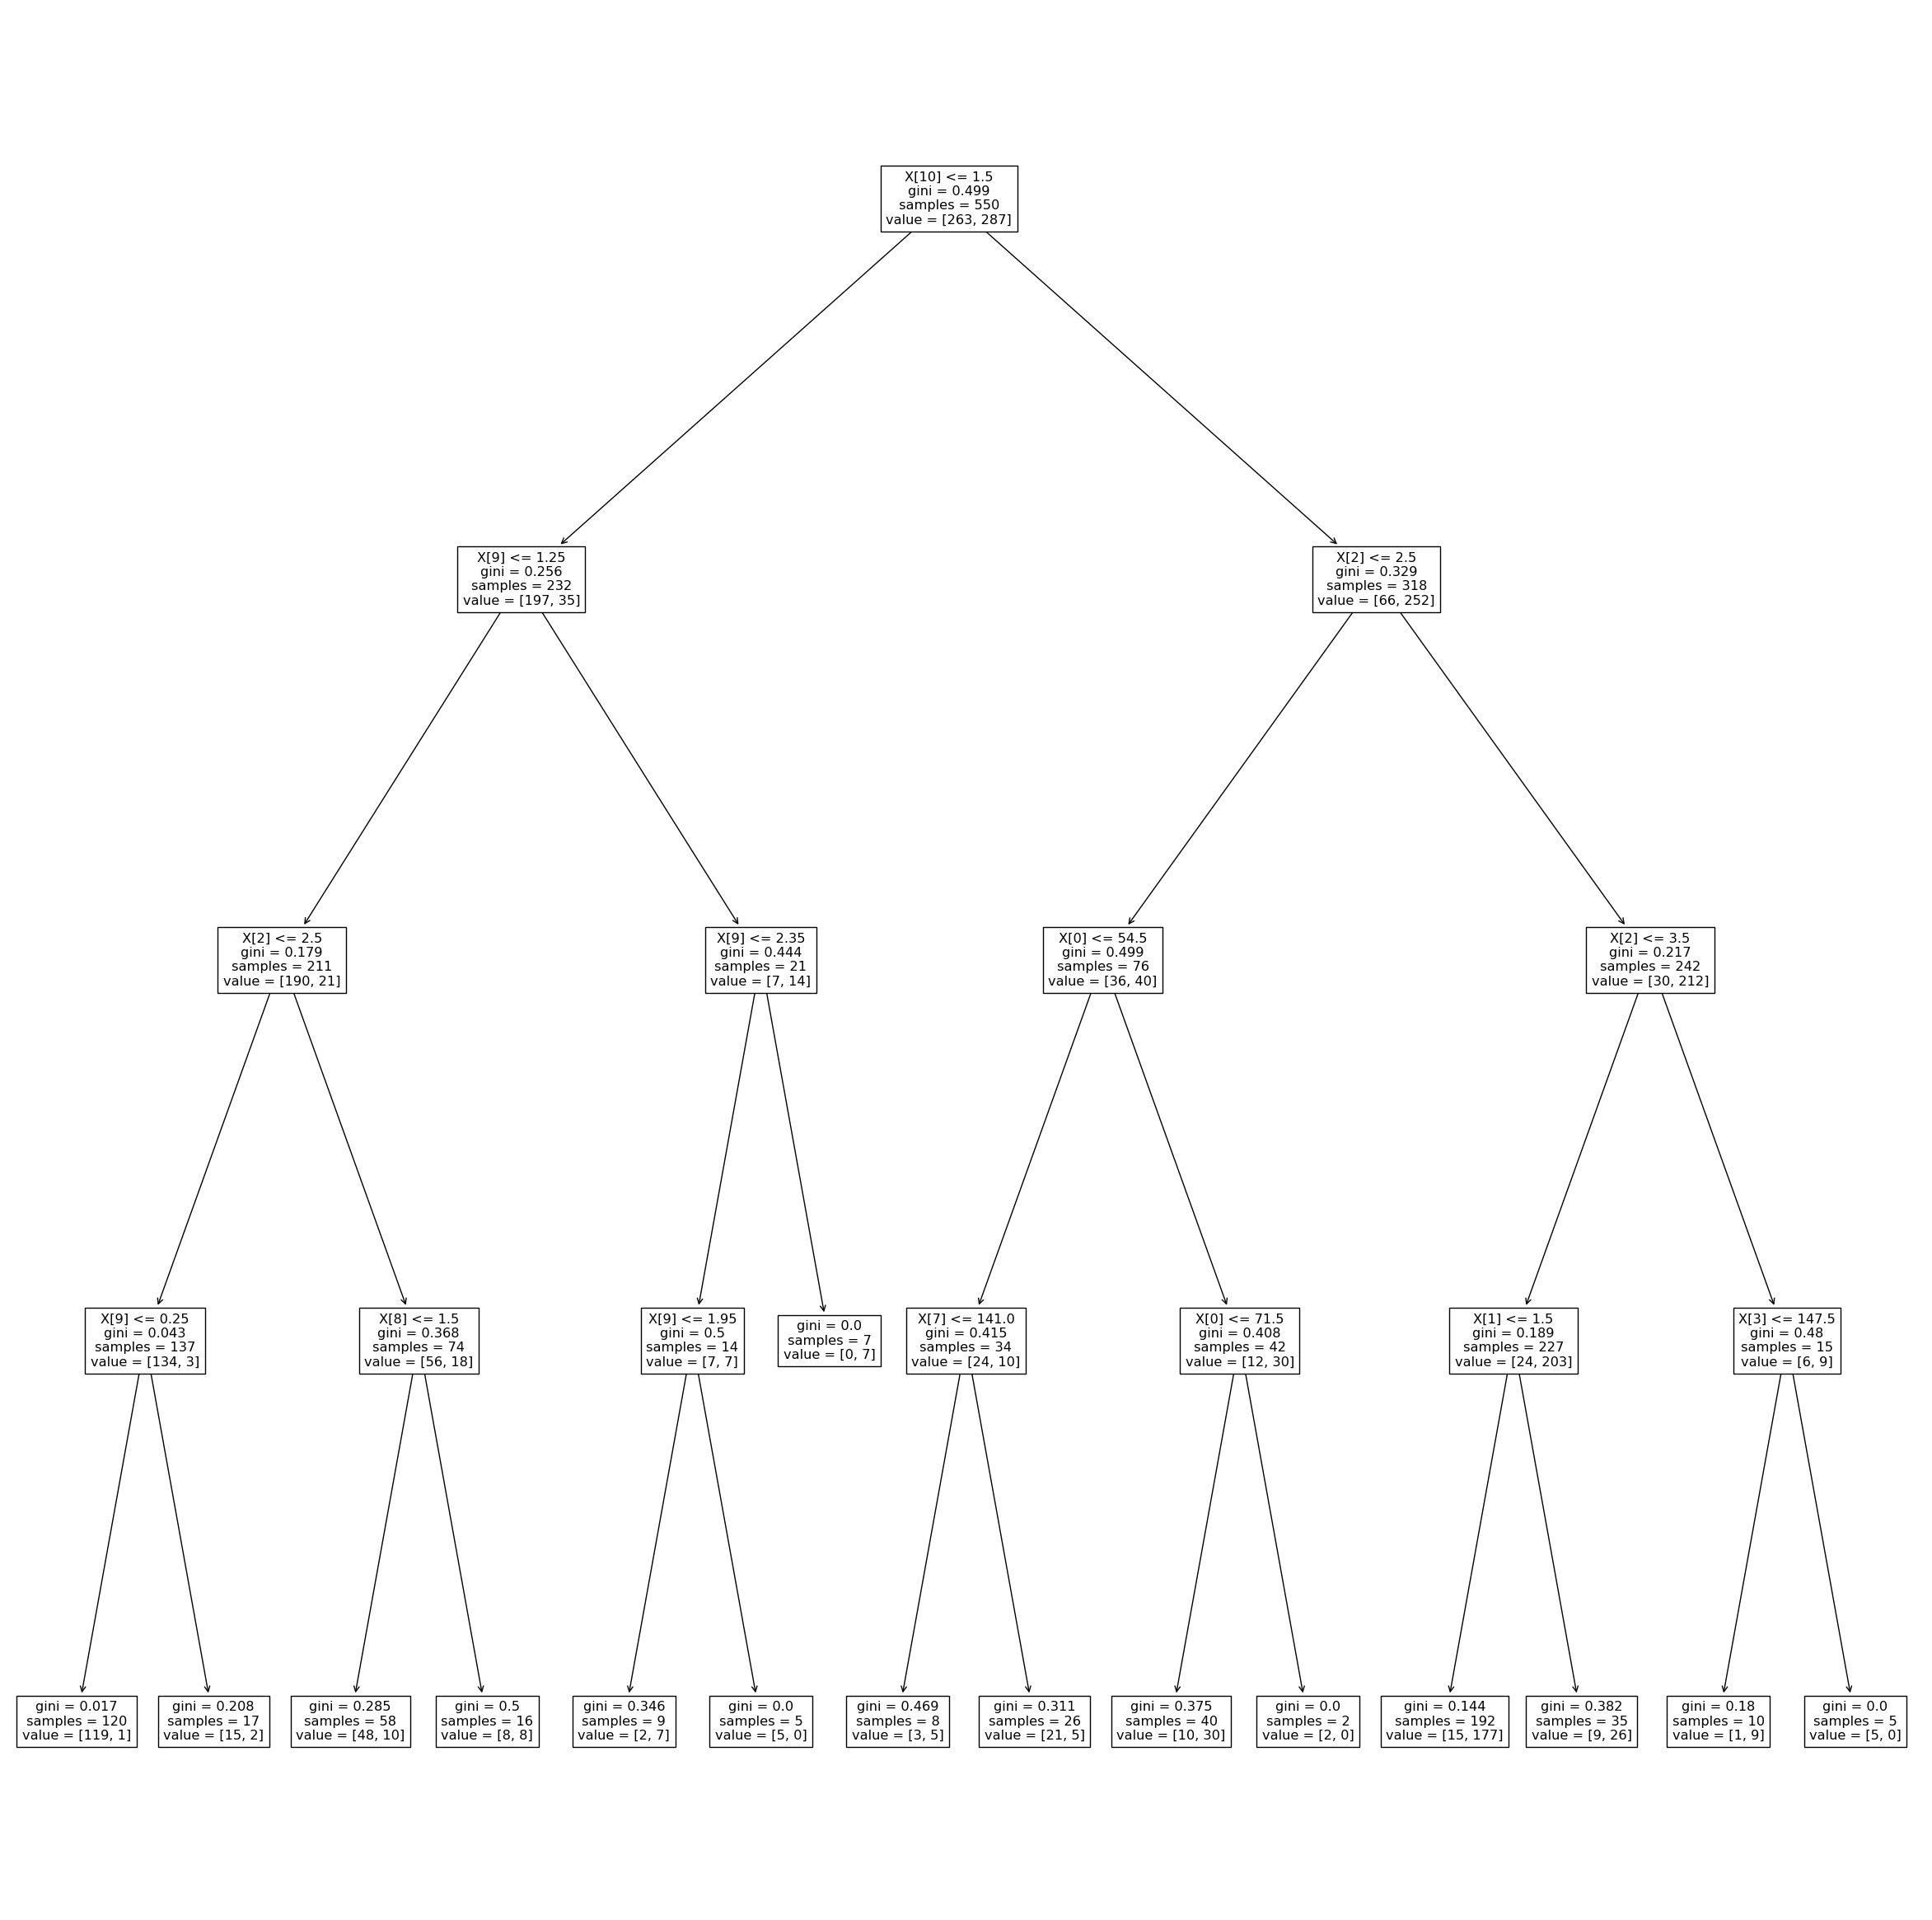

In [159]:
plt.figure(figsize=(30,30))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Visualize the GINI model decision tree 

In [42]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=str(y_train),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Draw a decision tree using Entropy as criterion

In [160]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

# Build and fit a model to predict values using the entropy index 

In [161]:
y_pred_test_en = clf_entropy.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_en)))

Model accuracy score with criterion entropy: 0.7745


In [163]:
y_pred_train_en = clf_entropy.predict(X_train)

# Find the train and test models’ accuracy 

Training-set accuracy score: 0.8527


In [48]:
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Training set score: 0.8527
Test set score: 0.8016


# Draw a decision tree for the base of the feature on the higher Entropy index 

[Text(0.5, 0.875, 'X[9] <= 1.5\nentropy = 0.999\nsamples = 550\nvalue = [263, 287]'),
 Text(0.25, 0.625, 'X[8] <= 1.25\nentropy = 0.612\nsamples = 232\nvalue = [197, 35]'),
 Text(0.125, 0.375, 'X[1] <= 2.5\nentropy = 0.467\nsamples = 211\nvalue = [190, 21]'),
 Text(0.0625, 0.125, 'entropy = 0.152\nsamples = 137\nvalue = [134, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.8\nsamples = 74\nvalue = [56, 18]'),
 Text(0.375, 0.375, 'X[8] <= 2.35\nentropy = 0.918\nsamples = 21\nvalue = [7, 14]'),
 Text(0.3125, 0.125, 'entropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.75, 0.625, 'X[1] <= 2.5\nentropy = 0.737\nsamples = 318\nvalue = [66, 252]'),
 Text(0.625, 0.375, 'X[6] <= 135.5\nentropy = 0.998\nsamples = 76\nvalue = [36, 40]'),
 Text(0.5625, 0.125, 'entropy = 0.771\nsamples = 31\nvalue = [7, 24]'),
 Text(0.6875, 0.125, 'entropy = 0.939\nsamples = 45\nvalue = [29, 16]'),
 Text(0.875, 0.375, 'X[3] <= 144.0\nentropy = 0.541\nsa

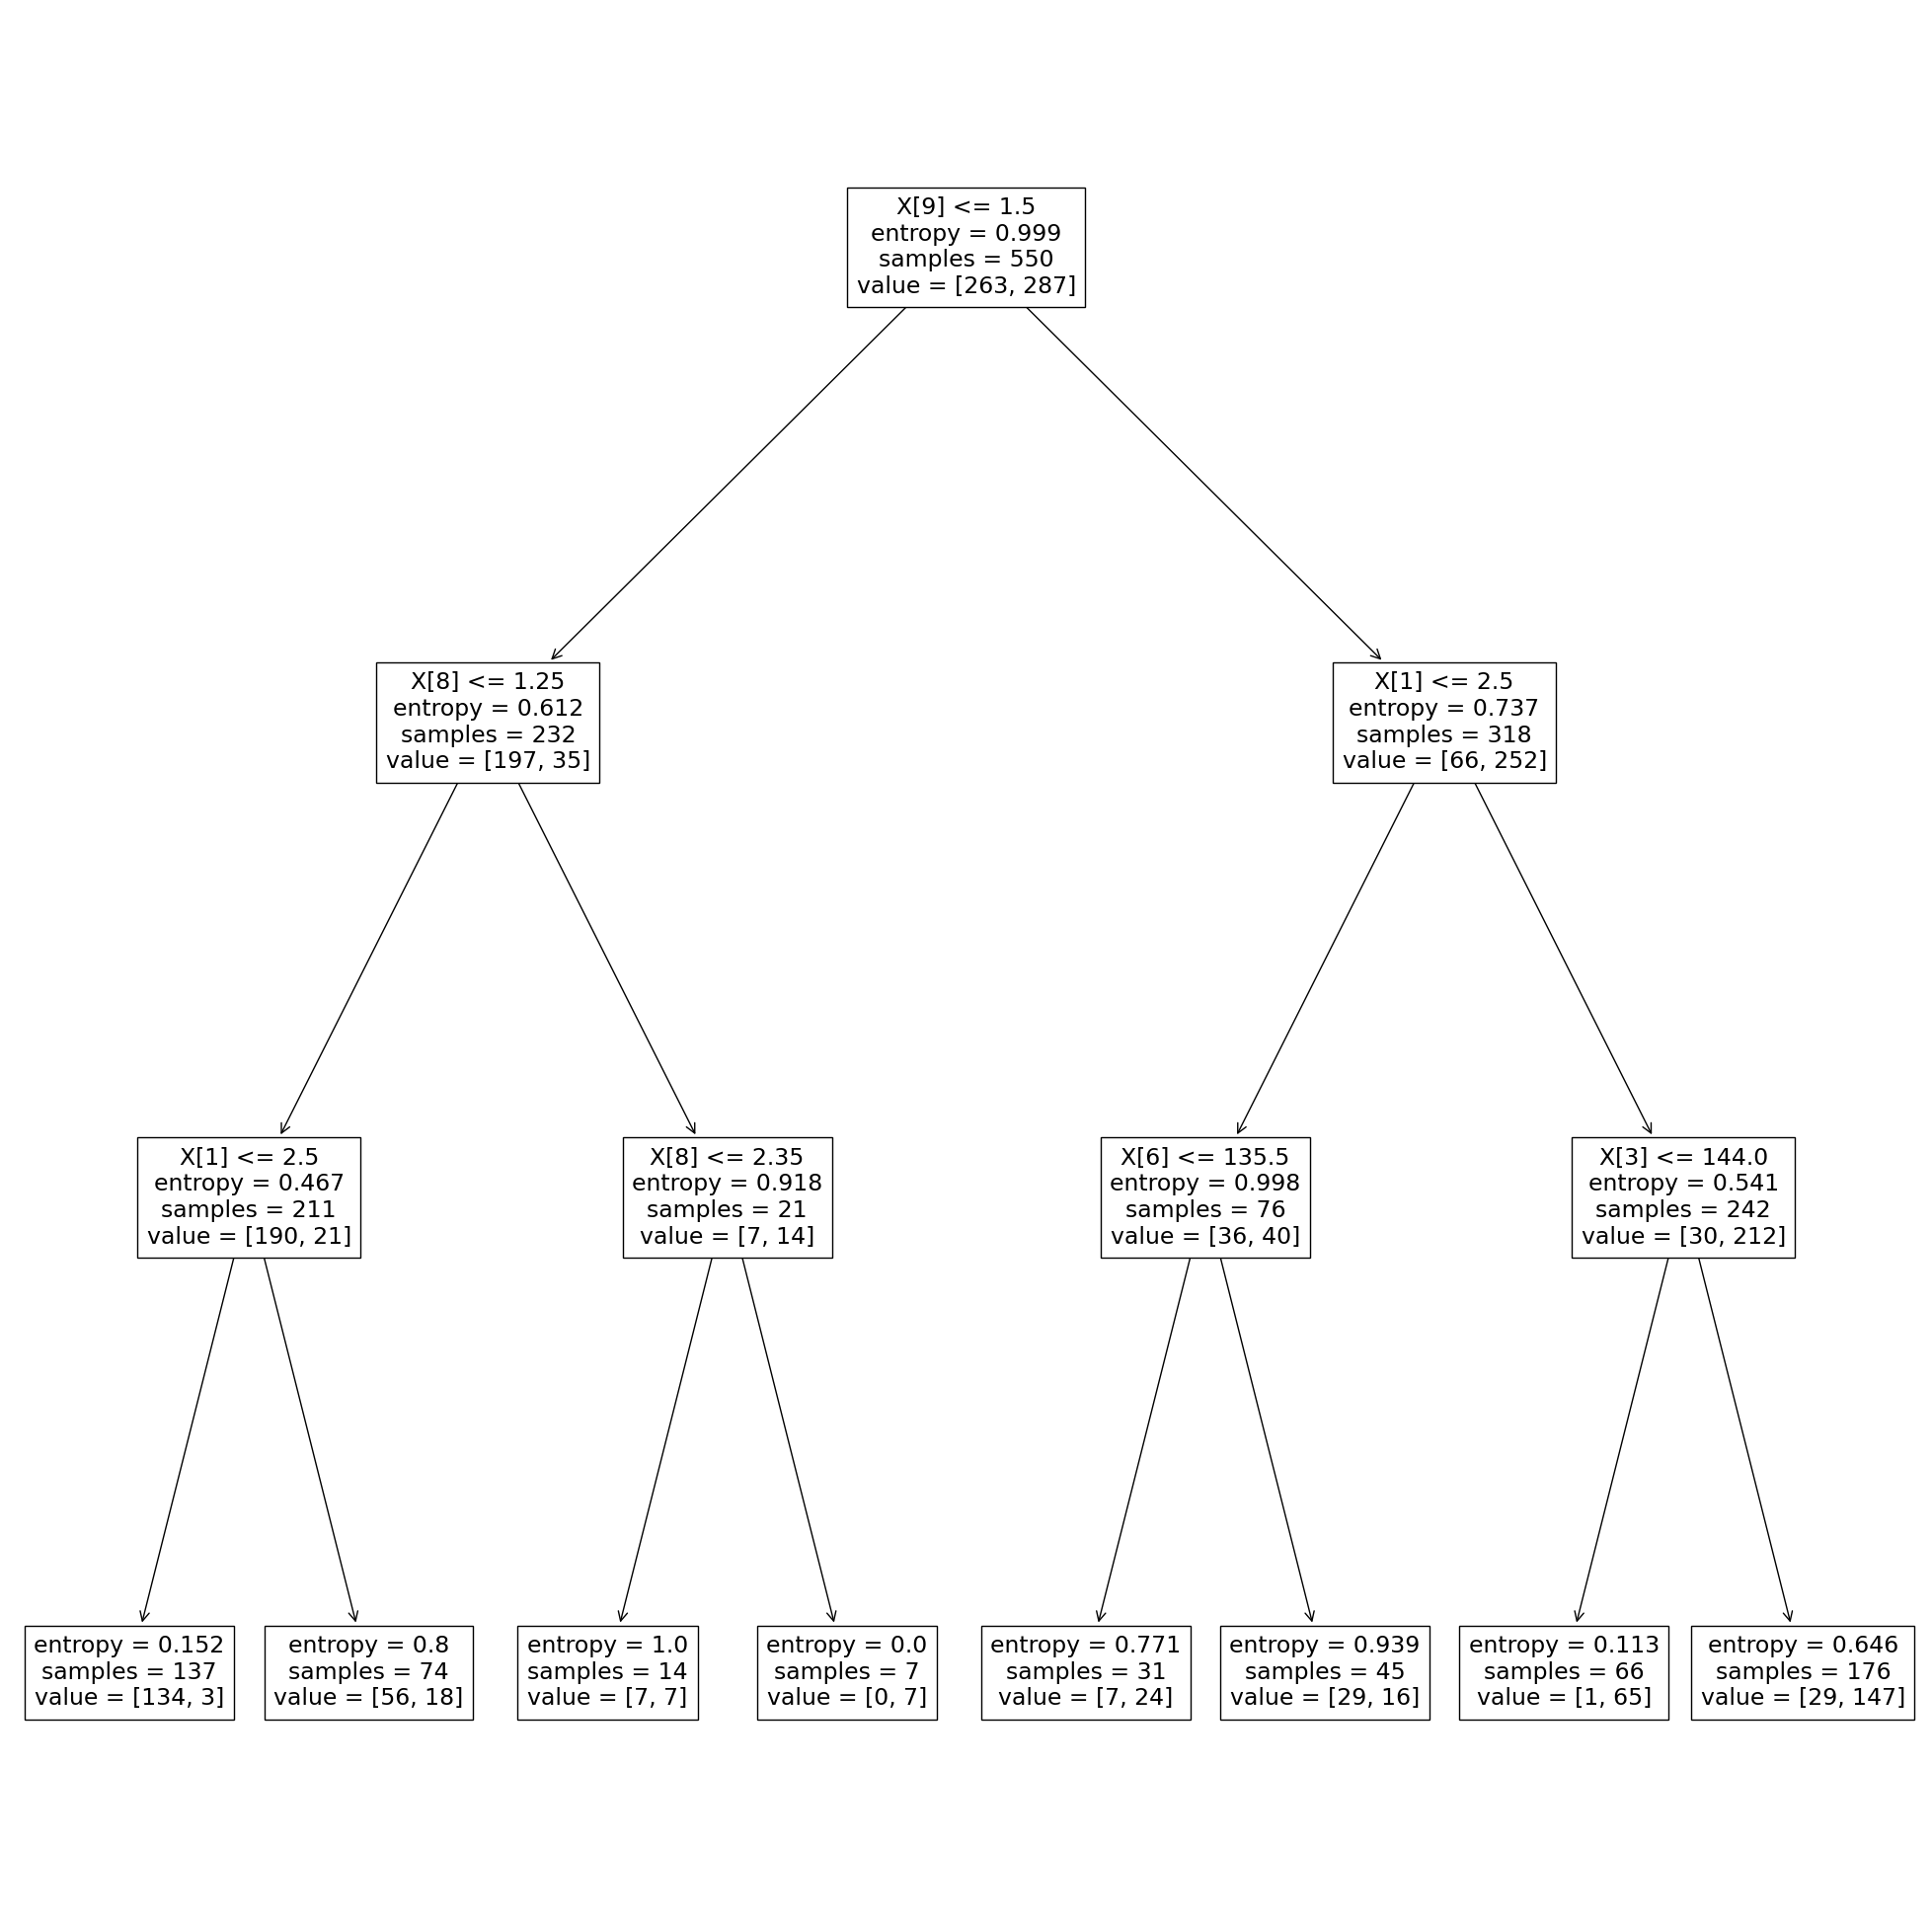

In [49]:
plt.figure(figsize=(25,25))

from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, y_train)) 

# Visualize the Entropy model decision tree 

In [50]:
import graphviz 
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=str(y_train),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [51]:
from graphviz import Source
graph_1 = Source( tree.export_graphviz(clf_entropy, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=str(y_train),  
                              filled=True, rounded=True,  
                              special_characters=True))
graph_1.format = 'png'
graph_1.render('dtree_render',view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Pull out the confusion matrix 

<AxesSubplot:title={'center':'Decision Tree Classifier Confusion Matrix'}>

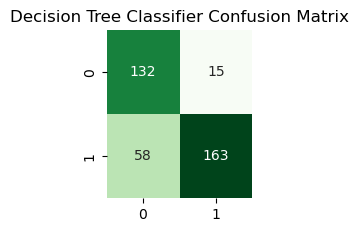

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_gini)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm,cbar=False,annot=True,cmap="Greens",fmt="d")

<AxesSubplot:title={'center':'Decision Tree Classifier Confusion Matrix'}>

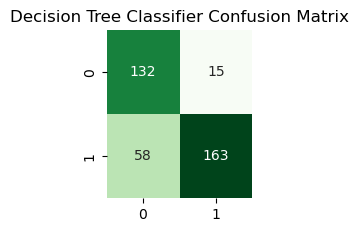

In [60]:
cm1 = confusion_matrix(y_test, y_pred_test_en)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm1,cbar=False,annot=True,cmap="Greens",fmt="d")

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_gini))
print(classification_report(y_test, y_pred_test_en))

              precision    recall  f1-score   support

           1       0.69      0.90      0.78       147
           2       0.92      0.74      0.82       221

    accuracy                           0.80       368
   macro avg       0.81      0.82      0.80       368
weighted avg       0.83      0.80      0.80       368

              precision    recall  f1-score   support

           1       0.69      0.90      0.78       147
           2       0.92      0.74      0.82       221

    accuracy                           0.80       368
   macro avg       0.81      0.82      0.80       368
weighted avg       0.83      0.80      0.80       368



In [147]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_gini)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_en)))

print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))

Model accuracy score with criterion gini index: 0.7799
Model accuracy score with criterion entropy: 0.7636
Training set score: 1.0000


# Define mutual information, entropy, conditional entropy, and joint entropy functions 

In [62]:
def entropy(Y):
    que, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en


def jEntropy(Y,X):
    YX = np.c_[Y,X]
    return entropy(YX)


def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

def gain(Y, X):
    return entropy(Y) - cEntropy(Y,X)

In [63]:
entropy(file1['Sex'])

0.7419405751709924

In [64]:
entropy(file1['ChestPainType'])

1.631436297117232

In [65]:
entropy(file1['RestingBP'])

4.69817451905611

In [66]:
entropy(file1['Cholesterol'])

6.750720962945913

In [67]:
entropy(file1['FastingBS'])

0.7834028547313432

In [68]:
entropy(file1['RestingECG'])

1.3686588891992502

In [69]:
entropy(file1['MaxHR'])

6.344942408702204

In [70]:
entropy(file1['ExerciseAngina'])

0.9733205654248684

In [71]:
entropy(file1['Oldpeak'])

3.7024489336492654

In [72]:
entropy(file1['ST_Slope'])

1.2882664091813778

In [73]:
entropy(file1['agerange'])

1.37202200907665

In [74]:
entropy(file1['HeartDisease'])

0.9917635659873447

In [75]:
mut_1=gain(file1['HeartDisease'],file1['Sex'])

In [76]:
mut_2=gain(file1['HeartDisease'],file1['ChestPainType'])

In [77]:
mut_3=gain(file1['HeartDisease'],file1['RestingBP'])

In [78]:
mut_4=gain(file1['HeartDisease'],file1['Cholesterol'])

In [79]:
mut_5=gain(file1['HeartDisease'],file1['FastingBS'])

In [80]:
mut_6=gain(file1['HeartDisease'],file1['RestingECG'])

In [81]:
mut_7=gain(file1['HeartDisease'],file1['MaxHR'])

In [82]:
mut_8=gain(file1['HeartDisease'],file1['ExerciseAngina'])

In [83]:
mut_9=gain(file1['HeartDisease'],file1['Oldpeak'])

In [84]:
mut_10=gain(file1['HeartDisease'],file1['ST_Slope'])

In [85]:
mut_11=gain(file1['HeartDisease'],file1['agerange'])

In [86]:
mut_infor = [mut_1,mut_2,mut_3,mut_4,mut_5,mut_6,mut_7,mut_8,mut_9,mut_10,mut_11]

In [87]:
dict_1 = {'Sex':mut_1,'ChestPainType':mut_2,'RestingBP':mut_3,'Cholesterol':mut_4,'FastingBS':mut_5,'RestingECG':mut_6,'MaxHR':mut_7,'ExerciseAngina':mut_8,'Oldpeak':mut_9,'ST_Slope':mut_10,'agerange':mut_11}

# Store the results in a dictionary 

In [88]:
dict_1

{'Sex': 0.06849492994172213,
 'ChestPainType': 0.22504364498561946,
 'RestingBP': 0.09016616114521536,
 'Cholesterol': 0.32181069416911967,
 'FastingBS': 0.05488017386129407,
 'RestingECG': 0.008720757944249868,
 'MaxHR': 0.23305844856993474,
 'ExerciseAngina': 0.18997453082570237,
 'Oldpeak': 0.20937410027346592,
 'ST_Slope': 0.29932108538982294,
 'agerange': 0.04558192802372485}

# Calculate conditional probability and multivariate effect  

In [109]:
file2= file1['HeartDisease']>1
file2 = file1[file1['HeartDisease']>1]
file2['prob_ST_SL'] = file2.groupby('ST_Slope')['ST_Slope'].transform(lambda x : x.count()/len(file1))
xd = sum(file2['prob_ST_SL'])/len(file2['prob_ST_SL'])
xd
file2

C:\Users\manga\AppData\Local\Temp\ipykernel_18656\2475496940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['prob_ST_SL'] = file2.groupby('ST_Slope')['ST_Slope'].transform(lambda x : x.count()/len(file1))


,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,agerange,prob_ST_SL
1,2,2,160,180,1,1,156,1,1.0,2,2,2,0.415033
3,2,3,138,214,1,1,108,2,1.5,2,2,2,0.415033
8,1,3,140,207,1,1,130,2,1.5,2,2,1,0.415033
11,1,1,136,164,1,2,99,2,2.0,2,2,2,0.415033
13,1,3,140,234,1,1,140,2,1.0,2,2,2,0.415033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,3,140,241,1,1,123,2,0.2,2,2,2,0.415033
913,1,4,110,264,1,1,132,1,1.2,2,2,2,0.415033
914,1,3,144,193,2,1,141,1,3.4,2,2,3,0.415033
915,1,3,130,131,1,1,115,2,1.2,2,2,2,0.415033


In [90]:
xd

0.3294692330125399

In [91]:
(xd/0.55337)*100

59.53868713745592

In [92]:
##file2= file1['ChestPainType']>1 
file2 = file1[file1['ChestPainType']>1]
file2['prob_chest'] = file2.groupby('ChestPainType')['ChestPainType'].transform(lambda x : x.count()/len(file1))
xd1 = sum(file2['prob_chest'])/len(file2['prob_chest'])
file2

C:\Users\manga\AppData\Local\Temp\ipykernel_18656\3760252192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['prob_chest'] = file2.groupby('ChestPainType')['ChestPainType'].transform(lambda x : x.count()/len(file1))


,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,agerange,prob_chest
1,2,2,160,180,1,1,156,1,1.0,2,2,2,0.221133
3,2,3,138,214,1,1,108,2,1.5,2,2,2,0.540305
4,1,2,150,195,1,1,122,1,0.0,1,1,2,0.221133
5,1,2,120,339,1,1,170,1,0.0,1,1,1,0.221133
8,1,3,140,207,1,1,130,2,1.5,2,2,1,0.540305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,3,140,241,1,1,123,2,0.2,2,2,2,0.540305
913,1,4,110,264,1,1,132,1,1.2,2,2,2,0.050109
914,1,3,144,193,2,1,141,1,3.4,2,2,3,0.540305
915,1,3,130,131,1,1,115,2,1.2,2,2,2,0.540305


In [93]:
xd1

0.42306882484536995

In [94]:
(xd1/0.55337)*100

76.45315518466305

In [95]:
(xd *xd1) / 0.5537

0.25173950015047974

In [96]:
file2 = file1[file1['HeartDisease']>1]
file2['prob_Oldpeak'] = file2.groupby('Oldpeak')['Oldpeak'].transform(lambda x : x.count()/len(file1))
xd2 = sum(file2['prob_Oldpeak'])/len(file2['prob_Oldpeak'])
file2

C:\Users\manga\AppData\Local\Temp\ipykernel_18656\2511216857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['prob_Oldpeak'] = file2.groupby('Oldpeak')['Oldpeak'].transform(lambda x : x.count()/len(file1))


,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,agerange,prob_Oldpeak
1,2,2,160,180,1,1,156,1,1.0,2,2,2,0.065359
3,2,3,138,214,1,1,108,2,1.5,2,2,2,0.045752
8,1,3,140,207,1,1,130,2,1.5,2,2,1,0.045752
11,1,1,136,164,1,2,99,2,2.0,2,2,2,0.067538
13,1,3,140,234,1,1,140,2,1.0,2,2,2,0.065359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,2,3,140,241,1,1,123,2,0.2,2,2,2,0.004357
913,1,4,110,264,1,1,132,1,1.2,2,2,2,0.020697
914,1,3,144,193,2,1,141,1,3.4,2,2,3,0.003268
915,1,3,130,131,1,1,115,2,1.2,2,2,2,0.020697


In [97]:
xd2

0.05766129723980579

In [98]:
file2 = file1[file1['HeartDisease']>1]
file2['prob_MaxHR'] = file2.groupby('MaxHR')['MaxHR'].transform(lambda x : x.count()/len(file1))
xd3 = sum(file2['prob_MaxHR'])/len(file2['prob_MaxHR'])
#file2

C:\Users\manga\AppData\Local\Temp\ipykernel_18656\4134923962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['prob_MaxHR'] = file2.groupby('MaxHR')['MaxHR'].transform(lambda x : x.count()/len(file1))


In [99]:
xd3

0.010683100886898923

In [100]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.0431982 , 0.12060075, 0.02246727, 0.07360935, 0.05538625,
       0.        , 0.08175357, 0.12748239, 0.12404617, 0.19310882,
       0.04560687])

# Sort mutual information results and visualize them

In [101]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ST_Slope          0.193109
ExerciseAngina    0.127482
Oldpeak           0.124046
ChestPainType     0.120601
MaxHR             0.081754
Cholesterol       0.073609
FastingBS         0.055386
agerange          0.045607
Sex               0.043198
RestingBP         0.022467
RestingECG        0.000000
dtype: float64

<AxesSubplot:>

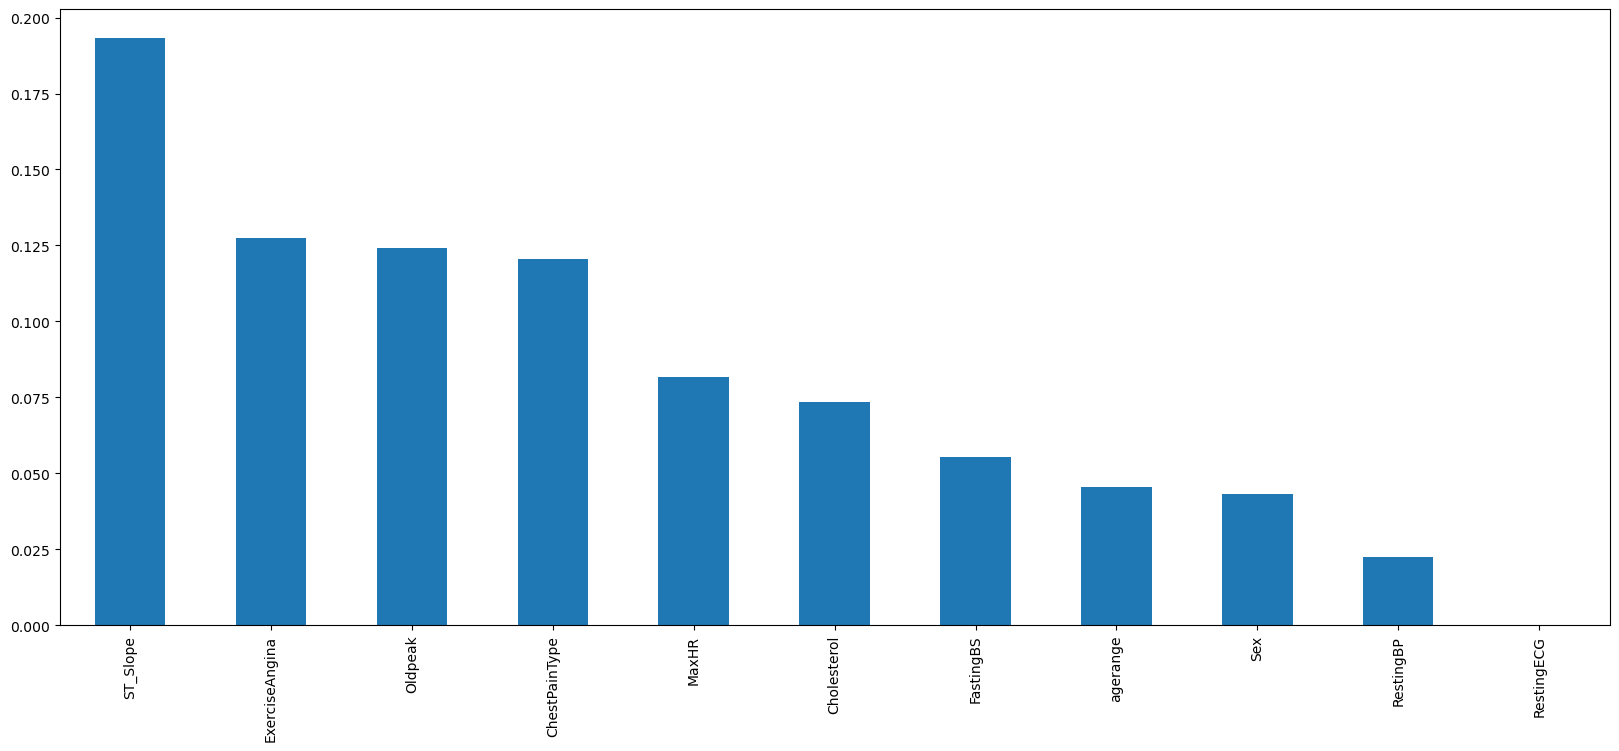

In [102]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

# Import SelectKBest &mutual_info_regression 

## These libraries are used to calculate the mutual information based on a built-in function and libraries

In [103]:
from sklearn.feature_selection import SelectKBest

In [104]:
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train.fillna(0), y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'agerange'],
      dtype='object')

In [105]:
from sklearn.feature_selection import mutual_info_regression
mutual_info1 = mutual_info_regression(X_train, y_train)
mutual_info1

array([0.        , 0.1535612 , 0.01065412, 0.09610856, 0.05761993,
       0.        , 0.07808723, 0.12947966, 0.14944172, 0.22839474,
       0.00644915])

In [106]:
mutual_info1 = pd.Series(mutual_info1)
mutual_info1.index = X_train.columns
mutual_info1.sort_values(ascending=False)

ST_Slope          0.228395
ChestPainType     0.153561
Oldpeak           0.149442
ExerciseAngina    0.129480
Cholesterol       0.096109
MaxHR             0.078087
FastingBS         0.057620
RestingBP         0.010654
agerange          0.006449
Sex               0.000000
RestingECG        0.000000
dtype: float64

# Visualize the results

<AxesSubplot:>

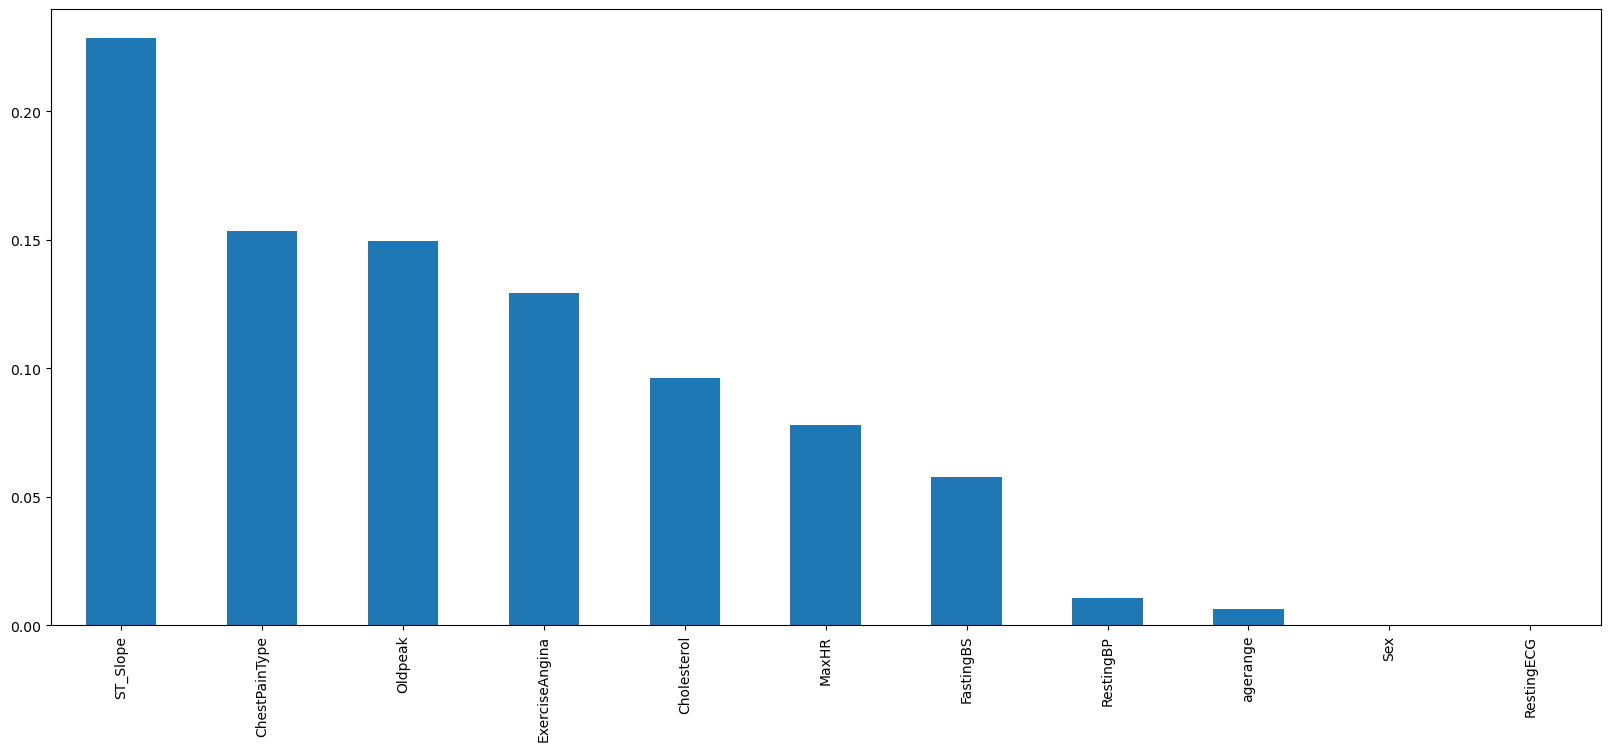

In [107]:
mutual_info1.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [108]:
sel_five_cols = SelectKBest(mutual_info_regression, k=10)
sel_five_cols.fit(X_train.fillna(0), y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'agerange'],
      dtype='object')